In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Assignments\Problem statements - ExcelR\Association rules\book.csv')

In [17]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [18]:
#Books = []

#with open(r'C:\Users\abhis\OneDrive\Desktop\DATA SCIENCE\ExcelR\Assignments\Problem statements - ExcelR\Association rules\book.csv') as f:
    
#    Books = f.read()

In [21]:
from mlxtend.frequent_patterns import apriori,association_rules

In [22]:
frequent_itemset = apriori(df,min_support=0.005,use_colnames=True,max_len=2)
frequent_itemset 

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
61,0.0375,"(ItalCook, ItalArt)"
62,0.0175,"(ItalCook, Florence)"
63,0.0165,"(ItalArt, ItalAtlas)"
64,0.0065,"(Florence, ItalAtlas)"


In [23]:
frequent_itemset.sort_values('support',ascending=False,inplace=True)

In [32]:
frequent_itemset.head()

,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
12,0.256,"(CookBks, ChildBks)"


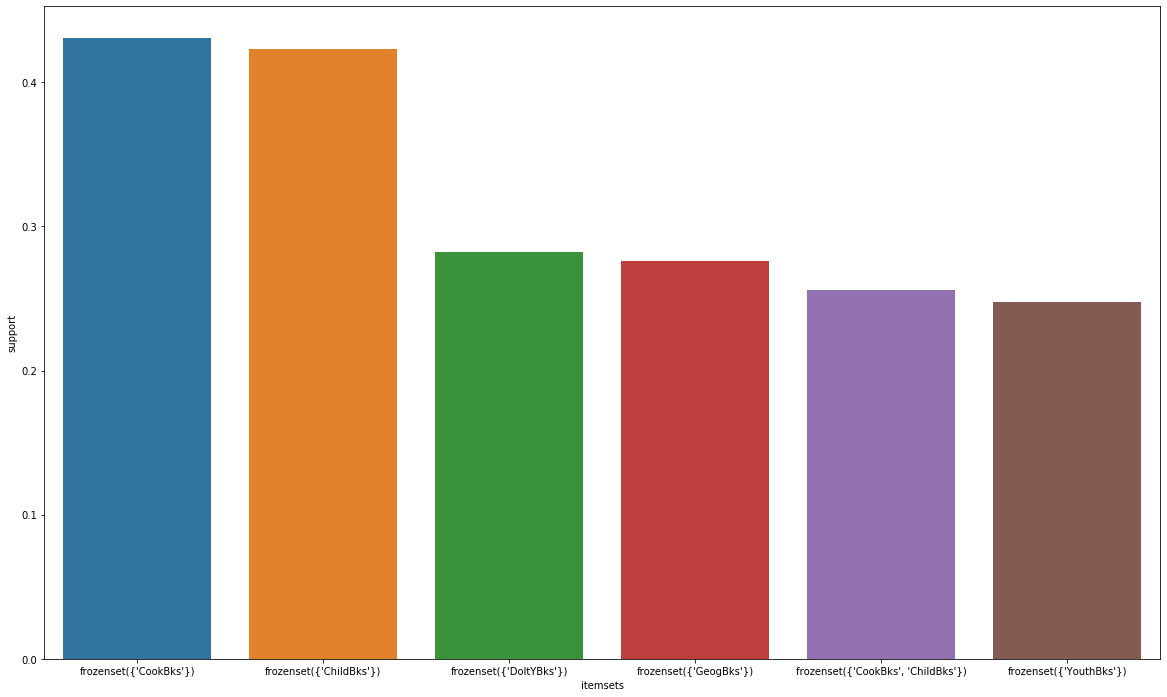

In [98]:
plt.figure(figsize=(20,12))
sns.barplot(x=frequent_itemset.itemsets[0:6],y=frequent_itemset.support[0:6],data=frequent_itemset)

In [36]:
rules = association_rules(frequent_itemset,metric='lift',min_threshold=0.8)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
4,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
5,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
6,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
7,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
8,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
9,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770


In [40]:
rules.sort_values('lift',ascending=False,inplace=True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
105,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
104,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
68,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
69,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
89,(ItalAtlas),(ItalCook),0.0370,0.1135,0.0230,0.621622,5.476842,0.018800,2.342893
88,(ItalCook),(ItalAtlas),0.1135,0.0370,0.0230,0.202643,5.476842,0.018800,1.207740
70,(RefBks),(ItalAtlas),0.2145,0.0370,0.0370,0.172494,4.662005,0.029063,1.163738
71,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
57,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
56,(ArtBks),(ItalArt),0.2410,0.0485,0.0485,0.201245,4.149378,0.036812,1.191229


In [67]:
# Eliminating Redudancy in Rules

In [68]:
def remove_red(i):
    return (sorted(list(i)))

In [69]:
X = rules.antecedents.apply(remove_red) + rules.consequents.apply(remove_red)
X

105     [ItalAtlas, ItalArt]
104     [ItalArt, ItalAtlas]
68       [ItalCook, ItalArt]
69       [ItalArt, ItalCook]
89     [ItalAtlas, ItalCook]
               ...          
75      [Florence, DoItYBks]
60       [CookBks, Florence]
61       [Florence, CookBks]
87      [YouthBks, Florence]
86      [Florence, YouthBks]
Length: 110, dtype: object

In [70]:
#X = X.sort_values()
#X

In [71]:
#X = X.apply(sorted)
#X

In [66]:
rules_set = list(X)
rules_set

[['ItalAtlas', 'ItalArt'],
 ['ItalArt', 'ItalAtlas'],
 ['ItalCook', 'ItalArt'],
 ['ItalArt', 'ItalCook'],
 ['ItalAtlas', 'ItalCook'],
 ['ItalCook', 'ItalAtlas'],
 ['RefBks', 'ItalAtlas'],
 ['ItalAtlas', 'RefBks'],
 ['ItalArt', 'ArtBks'],
 ['ArtBks', 'ItalArt'],
 ['Florence', 'ItalArt'],
 ['ItalArt', 'Florence'],
 ['CookBks', 'ItalCook'],
 ['ItalCook', 'CookBks'],
 ['ItalArt', 'GeogBks'],
 ['GeogBks', 'ItalArt'],
 ['DoItYBks', 'ItalArt'],
 ['ItalArt', 'DoItYBks'],
 ['YouthBks', 'ItalCook'],
 ['ItalCook', 'YouthBks'],
 ['ItalCook', 'ArtBks'],
 ['ArtBks', 'ItalCook'],
 ['GeogBks', 'ItalCook'],
 ['ItalCook', 'GeogBks'],
 ['ItalAtlas', 'ArtBks'],
 ['ArtBks', 'ItalAtlas'],
 ['GeogBks', 'ItalAtlas'],
 ['ItalAtlas', 'GeogBks'],
 ['CookBks', 'ItalArt'],
 ['ItalArt', 'CookBks'],
 ['RefBks', 'ItalArt'],
 ['ItalArt', 'RefBks'],
 ['GeogBks', 'ArtBks'],
 ['ArtBks', 'GeogBks'],
 ['YouthBks', 'ItalArt'],
 ['ItalArt', 'YouthBks'],
 ['YouthBks', 'ItalAtlas'],
 ['ItalAtlas', 'YouthBks'],
 ['RefBks', 'Ita

In [95]:
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_set)]

index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_set.index(i))

In [96]:
# getting rules without any redudancy 

rules_without_redudancy = rules.iloc[index_rules]
rules_without_redudancy 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
78,(DoItYBks),(ItalArt),0.2820,0.0485,0.0300,0.106383,2.193463,0.016323,1.064774
6,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
58,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
66,(CookBks),(ItalArt),0.4310,0.0485,0.0410,0.095128,1.961394,0.020096,1.051529
...,...,...,...,...,...,...,...,...,...
11,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095
5,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
20,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548


In [97]:
rules_without_redudancy.sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
105,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
104,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
69,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
68,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
89,(ItalAtlas),(ItalCook),0.0370,0.1135,0.0230,0.621622,5.476842,0.018800,2.342893
